# Credit Risk Mangement


In [718]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(10, 5))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [719]:
df = pd.read_csv("cr_loan2.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [720]:
pd.crosstab(df['person_home_ownership'], df['loan_status'],values=df['loan_int_rate'], aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


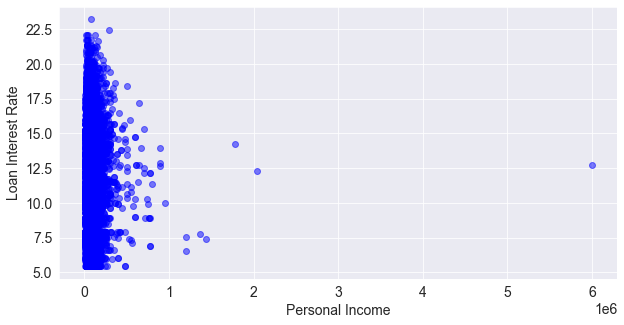

In [721]:
import matplotlib.pyplot as plt
plt.scatter(df['person_income'], df['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel("Personal Income")
plt.ylabel("Loan Interest Rate")
plt.show()

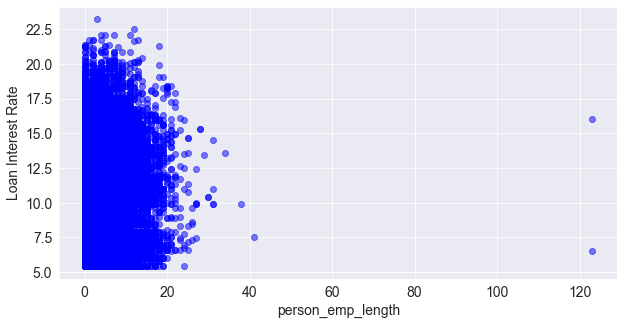

In [722]:
import matplotlib.pyplot as plt
plt.scatter(df['person_emp_length'], df['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel("person_emp_length")
plt.ylabel("Loan Interest Rate")
plt.show()

In [723]:
# check outlier
indices = df[df['person_income'] >= 6000000].index
indices

Int64Index([32297], dtype='int64')

In [724]:
df.drop(indices, inplace=True)

In [725]:
# Dropping missing data
indices = df[df['person_emp_length']>=60].index
len(indices)

2

In [726]:
df.drop(indices, inplace=True)

### Missing data

In [727]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [728]:
# mean
df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace = True)

In [729]:
# Dropping missing data
indices = df[df['person_emp_length'].isnull()].index
len(indices)
df.drop(indices, inplace=True)

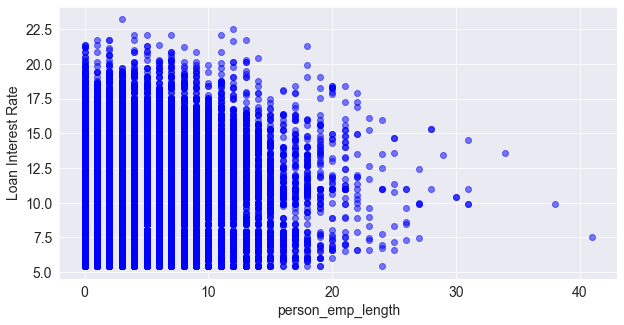

In [730]:
plt.scatter(df['person_emp_length'], df['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel("person_emp_length")
plt.ylabel("Loan Interest Rate")
plt.show()

# Logistic Regression

### Creating the training and test sets

In [731]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [732]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### One-hot encoding credit data
Dealing with the non-numeric columns so they can be added to your LogisticRegression() model.

In [733]:
# Create two data sets for numeric and non-numeric data
cred_num = df.select_dtypes(exclude=['object'])
cred_str = df.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
df = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(df.columns)

df.head()

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [734]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Create the X and y data sets
#X = df[['person_age', 'person_income','loan_int_rate','person_emp_length','loan_amnt']]
#y = df[['loan_status']]

X = df.drop('loan_status', axis = 1)
y = df[['loan_status']]
       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[-5.87883518e-08 -4.04997907e-05 -2.30244692e-08  1.06354602e-04
   7.87070938e-08  2.49792855e-09 -1.08889383e-08 -6.33044318e-09
   9.30502083e-11 -3.77160832e-09  7.73130402e-09  2.80637475e-09
  -2.87470855e-09  1.73574650e-09  1.51619446e-09 -1.71623831e-09
  -3.74506612e-09 -1.05421587e-08 -5.28144691e-09 -1.99926726e-09
   1.08045499e-08  3.36158604e-09  1.00528979e-09  3.73749861e-10
  -8.99907141e-09  6.72137414e-09]]


In [735]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_lr = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df_lr], axis = 1))

   loan_status  prob_default
0            0      0.183439
1            0      0.236105
2            0      0.028680
3            0      0.129158
4            0      0.303197


### Visualize scoring credit models

0.8097680290358213


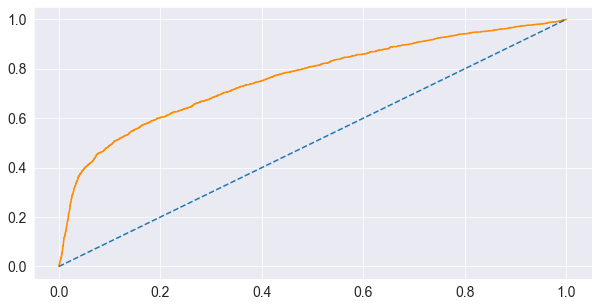

In [736]:
from sklearn.metrics import roc_curve, roc_auc_score

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [737]:
from sklearn.metrics import classification_report
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    12073
1      601
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9970
     Default       0.74      0.17      0.27      2704

    accuracy                           0.81     12674
   macro avg       0.78      0.57      0.58     12674
weighted avg       0.80      0.81      0.76     12674



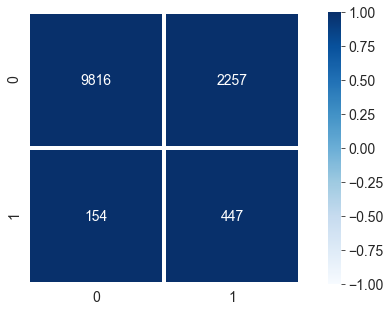

In [738]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Print the confusion matrix
confusionMatrix =confusion_matrix(y_test,preds_df['loan_status'])
cm=pd.DataFrame(confusionMatrix.T, index=clf_logistic.classes_, columns=clf_logistic.classes_)
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)    

### Change thresholds 

In [739]:
from sklearn.metrics import precision_recall_fscore_support
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * df['loan_amnt'].mean()* (1 - default_recall))

10327391.64233925


# Gradient boosted trees with XGBoost

!pip install --user xgboost

### Setting up cross validation within XGBoost

Best: -0.190820 using {'learning_rate': 0.1}
-0.685673 (0.000066) with: {'learning_rate': 0.0001}
-0.624515 (0.000672) with: {'learning_rate': 0.001}
-0.329497 (0.004202) with: {'learning_rate': 0.01}
-0.190820 (0.011788) with: {'learning_rate': 0.1}
-0.195394 (0.013570) with: {'learning_rate': 0.2}
-0.207217 (0.014955) with: {'learning_rate': 0.3}
nan (nan) with: {'learning_rate': 0.4}


Text(0, 0.5, 'Log Loss')

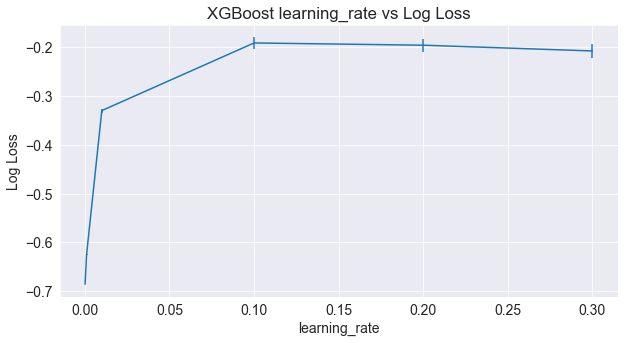

In [447]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
model = xgb.XGBClassifier(max_depth = 10)
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')

In [448]:
import time
start_time = time.time()

In [449]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = xgb.XGBClassifier(max_depth = 10)
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4]
n_estimators = [100, 200, 300, 400, 500]
max_depth=[3,4,5,6,8,10]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.183790 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [450]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1756.0833623409271 seconds ---


In [451]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))    
    

-0.686938 (0.000088) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100}
-0.680850 (0.000175) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 200}
-0.674888 (0.000268) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 300}
-0.669044 (0.000362) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 400}
-0.663313 (0.000456) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 500}
-0.686559 (0.000102) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-0.680099 (0.000204) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
-0.673760 (0.000305) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 300}
-0.667539 (0.000404) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 400}
-0.661438 (0.000503) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 500}
-0.686270 (0.000110) with: {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 100}
-0.679528 

##### plot
scores = np.array(means).reshape(len(learning_rate), len(n_estimators), len(max_depth))
   
for j, value in enumerate(max_depth):
    plt.plot(max_depth, scores[j], label='max_depth:' + str(value))

plt.legend()
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')

##### plot
for i, val in enumerate(n_estimators):
    plt.plot(n_estimators, scores[i], label='n_estimators:' + str(val))

#plt.legend()
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

#### plot
scores = np.array(means).reshape(len(learning_rate), len(n_estimators), len(max_depth))
    
for i, val in enumerate(n_estimators):
    plt.plot(n_estimators, scores[i], label='n_estimators:' + str(val))
    
for j, value in enumerate(max_depth):
    plt.plot(max_depth, scores[j], label='max_depth:' + str(value))

plt.legend()
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')

In [918]:
# Train a model with the optmized learning rate
import xgboost as xgb
clf_gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 4,n_estimators=500).fit(X_train, np.ravel(y_train)) 
# Hyperparameters of gradient boosted trees

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_gbt = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df_gbt], axis = 1))

   loan_status  prob_default
0            0      0.015213
1            0      0.003484
2            0      0.004116
3            0      0.003704
4            0      0.115731


In [919]:
from sklearn.metrics import classification_report
# Create a dataframe for the probabilities of default
preds_df_gbt = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df_gbt['loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

# Print the row counts for each loan status
print(preds_df_gbt['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

0    10476
1     2198
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9970
     Default       0.92      0.75      0.83      2704

    accuracy                           0.93     12674
   macro avg       0.93      0.87      0.89     12674
weighted avg       0.93      0.93      0.93     12674



### Plotting column importances

In [868]:
# Train the model
clf_gbt.fit(X_train,np.ravel(y_train))
# Print the feature importances
clf_gbt.get_booster().get_score(importance_type = 'weight')

{'loan_percent_income': 479,
 'loan_int_rate': 800,
 'person_income': 1745,
 'loan_grade_D': 138,
 'loan_grade_C': 74,
 'person_emp_length': 398,
 'person_home_ownership_RENT': 165,
 'loan_intent_DEBTCONSOLIDATION': 100,
 'loan_intent_MEDICAL': 159,
 'person_home_ownership_OWN': 102,
 'loan_intent_HOMEIMPROVEMENT': 104,
 'cb_person_default_on_file_N': 44,
 'loan_grade_E': 87,
 'loan_grade_A': 19,
 'loan_grade_B': 72,
 'loan_intent_VENTURE': 69,
 'loan_grade_G': 44,
 'person_home_ownership_OTHER': 3,
 'person_age': 400,
 'person_home_ownership_MORTGAGE': 66,
 'loan_grade_F': 53,
 'loan_amnt': 568,
 'loan_intent_PERSONAL': 67,
 'loan_intent_EDUCATION': 52,
 'cb_person_cred_hist_length': 220}

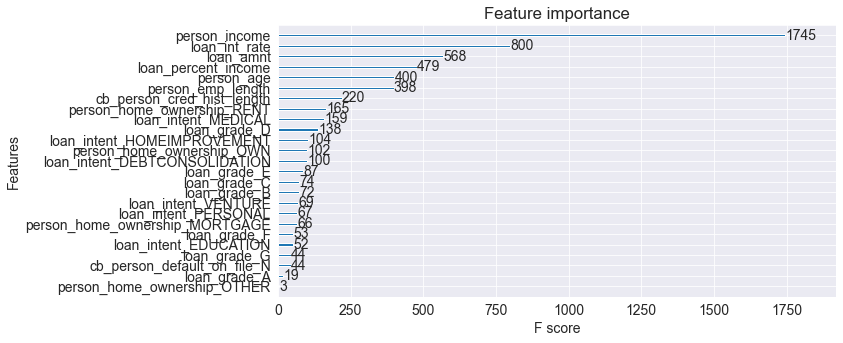

In [869]:
xgb.plot_importance(clf_gbt, importance_type = 'weight')

# Model evaluation and implementation

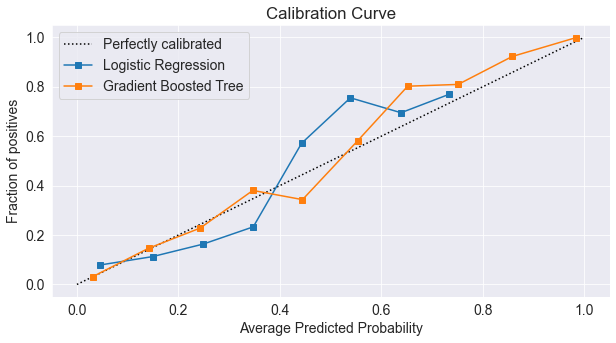

In [870]:
from sklearn.calibration import calibration_curve
fraction_of_positives_lr, mean_predicted_value_lr =calibration_curve(y_test, preds[:,1], n_bins =10)
fraction_of_positives, mean_predicted_value =calibration_curve(y_test, gbt_preds[:,1], n_bins =10)



# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_predicted_value, fraction_of_positives,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [871]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df ['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])


              precision    recall  f1-score   support

 Non-Default       0.86      0.93      0.89      9970
     Default       0.63      0.45      0.52      2704

    accuracy                           0.82     12674
   macro avg       0.74      0.69      0.71     12674
weighted avg       0.81      0.82      0.81     12674

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9970
     Default       0.92      0.75      0.83      2704

    accuracy                           0.93     12674
   macro avg       0.93      0.87      0.89     12674
weighted avg       0.93      0.93      0.93     12674

0.7067962519148141
0.8932729547652027


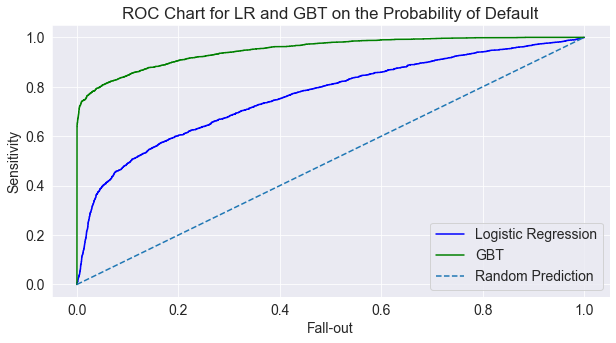

In [872]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds[:, 1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

# Credit Acceptance rates

In [873]:
# Compute the threshold for 85% acceptance rate
threshold = np.quantile(preds_df['prob_default'], 0.85)
threshold

0.40177949698265436

In [874]:
# Compute the quantile on the probabilities of default
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

# Selecting acceptance rates

In [875]:
# Compute the quantile on the probabilities of default
# preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.804 else 0)

In [876]:
# Check the statistics of the probabilities of default
print(preds_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(preds_df['prob_default'], 0.85)
print(threshold_85)
# Apply acceptance rate threshold
preds_df['pred_loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(preds_df['pred_loan_status'].value_counts())

count    1.267400e+04
mean     2.289012e-01
std      1.515439e-01
min      9.282964e-26
25%      1.036405e-01
50%      2.121542e-01
75%      3.376134e-01
max      7.845570e-01
Name: prob_default, dtype: float64
0.40177949698265436
0    10773
1     1901
Name: pred_loan_status, dtype: int64


In [877]:
# Check the statistics of the probabilities of default
print(preds_df_gbt['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(preds_df_gbt['prob_default'], 0.85)
print(threshold_85)
# Apply acceptance rate threshold
preds_df_gbt['pred_loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(preds_df_gbt['pred_loan_status'].value_counts())

count    12674.000000
mean         0.209256
std          0.332467
min          0.000002
25%          0.015505
50%          0.051026
75%          0.176893
max          1.000000
Name: prob_default, dtype: float64
0.7041333913803091
0    10773
1     1901
Name: pred_loan_status, dtype: int64


# Credit strategy and minimumal expected lossess


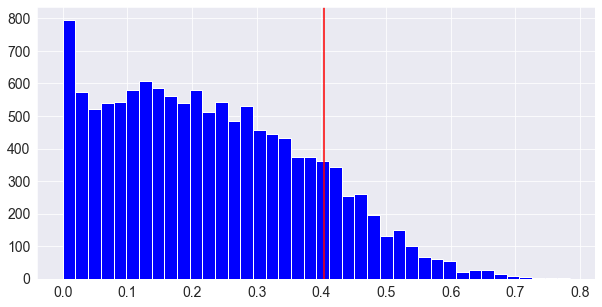

In [878]:
# Plot the predicted probabilities of default
plt.hist(preds_df['prob_default'] , color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(preds_df, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold , color = 'red')
plt.show()

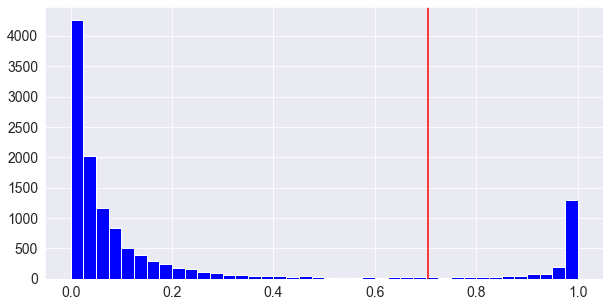

In [879]:
# Plot the predicted probabilities of default
plt.hist(preds_df_gbt['prob_default'] , color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(preds_df_gbt['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold , color = 'red')
plt.show()

In [880]:
# Set all the acceptance rates to test
accept_rates = [1.0,0.95,0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,0.5, 0.45, 0.4, 0.35, 0.3, 0.25,0.20,0.15,0.1,0.05,0.005]
# Create lists to store thresholds and bad rates
thresholds = []
bad_rates = []

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
  	# Calculate the threshold for the acceptance rate
    threshold = np.quantile(preds_df_gbt['prob_default'], rate)
    # Add the threshold value to the list of thresholds
    thresholds.append(threshold)
    # Reassign the loan_status value using the threshold
    preds_df_gbt['pred_loan_status'] = \
    preds_df_gbt['prob_default'].apply(lambda x: 1 if x > threshold else 0)
    # Create a set of accepted loans using this acceptance rate
    preds_df_gbt['known loan status']=y_test
    preds_df_gbt=preds_df_gbt.dropna()
    accepted_loans = preds_df_gbt[preds_df_gbt['pred_loan_status'] == 0]
    
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum(accepted_loans['known loan status']) / len(accepted_loans))

In [901]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])


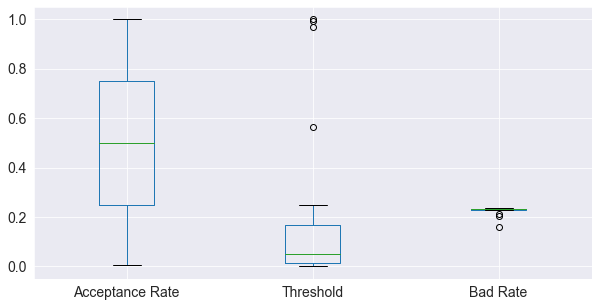

In [882]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

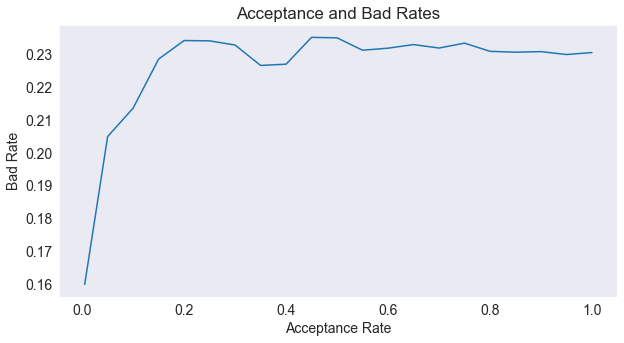

In [883]:
#### Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [923]:
strat_df['loan_amnt']=df['loan_amnt']

strat_df['loss_given_default']= preds_df['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)
strat_df['prob_default'] =preds_df['prob_default']


In [926]:
# Print the first five rows of the data frame


# Calculate the bank's expected loss and assign it to a new column
strat_df['expected_loss'] = strat_df['prob_default'] * strat_df['loan_amnt'] * strat_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(strat_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $63,346.36
